In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import classification_report

# 
#  Predicting Positions of FIFA players
Machine Learning / SoftUni<br>
Kalin Petrov 18.11.2021<br><br>


1. Problem definition<br>
2. Data analysis<br>
3. Data Preparation<br>
    3.1 Feature Selection 'positions'<br>
    3.2 Feature Engineering 'positions'<br>
    3.3 Feature Selection 'skills'<br>
    3.4 Feature Normalization<br>
    3.5. Splitting the data<br>
4. Algorithm Evaluation<br>
    4.1. Logistic Regression<br>
    4.2. Decision Tree Classifier<br>
    4.3. Random Forest Classifier<br>
    4.4. AdaBoost Classifier<br>
    4.5. KNeighbors Classifier<br>
    4.6. Support Vector Machine
5. Result Improvement
6. Result Presentation

## 1. Problem definition

I introduce you to a dataset with all football players from one very popular PC game - FIFA. This dataset consists of almost 17 000 players from all around the world. Each row represents a particular player who has lots of information and statistics about him - like age, nationality, football club, prefered foot, etc. Those player "features' as we can name them are 88, so our dataset has 88 columns. We will concentrate precisely on the most interesting stats - the player skills like dribbling, finishing (scoring), passing, heading, marking etc. (their values are in some kind of range and the bigger number represents better qualification in the particular skill). On other hand, each player has its own role on the playfield and this role is more or less correlated with his skills. If he is a good defender - he will have better defending skills than attacking, if he plays in the middle of the field he will have a different set of skills. But the things are not that simple - there are so many different players with different capabilities so the mentioned differences are not that strict. There are also positions that are not that strictly separated and require both attacking, defending and other skills. A good example of such player positions are for example the defensive midfielder, the attacking midfielder, the wing back, etc. There are also players who have tons of skills and can play on each position on the field.

Here comes my role. I will try to predict each player's position based on the skills that he has. <br>
For this purpose I will use a set of algorithms and will try to create the best model that can predict a player's position.

## 2. Data analysis

In [3]:
df = pd.read_csv('fifa-players-dataset.csv')

In [4]:
df.shape

(18207, 88)

##### Display all the columns
As we can see - the columns are 88 and if we want to visualise them with head() or sample(), we won't be able to see all of them. To show all the columns of our dataframe and be able to decide which columns we will need, we must change the pandas **display max columns** setting.

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

## 3. Data Preparation

It seems that the column that we are interested in is called **Position** - this will be our target column. <br>We will then use the skills of the players which are starting with the column **Crossing**, all the way up to the last field, excluding **Release Clause**. Those skills are with some values from low to high and the higher number - more skillful the player is.<br><br>
Let's create two dataframes - one with the positions and one with the skills we want to track and measure.

### 3.1 Feature Selection $\color{red}{\text{ 'positions' }}$

In [8]:
df.Position

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [9]:
df.groupby(['Position']).size()

Position
CAM     958
CB     1778
CDM     948
CF       74
CM     1394
GK     2025
LAM      21
LB     1322
LCB     648
LCM     395
LDM     243
LF       15
LM     1095
LS      207
LW      381
LWB      78
RAM      21
RB     1291
RCB     662
RCM     391
RDM     248
RF       16
RM     1124
RS      203
RW      370
RWB      87
ST     2152
dtype: int64

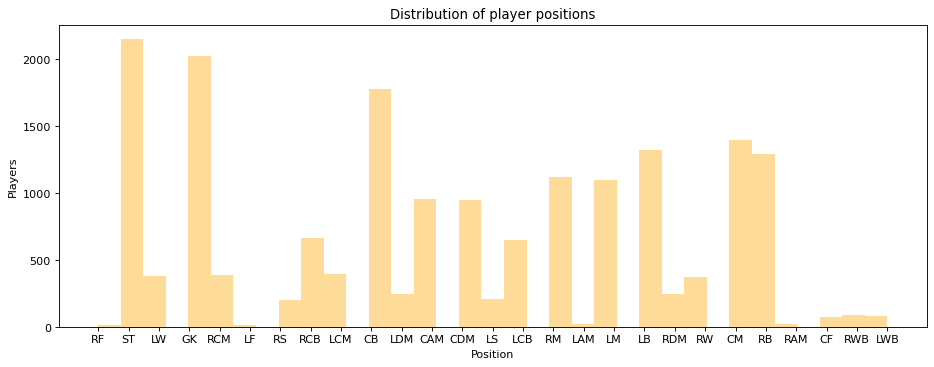

In [10]:
plt.figure(figsize=(14, 5), dpi=80)
df['Position'].hist(color='orange', alpha=0.4, bins=35)
plt.grid(False)
plt.xlabel('Position')
plt.ylabel('Players')
plt.title('Distribution of player positions')
plt.show()

It looks like we have a lot of different positions. They are not evenly distributed.

In [11]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

Seems like we have players that don't have a valid position. This will be a problem. <br> Lets see how many such players we have and why we have such.

In [12]:
problematic_players = df[df['Position'].isna()]
problematic_players

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NaN,https://cdn.sofifa.org/flags/53.png,€ 0,€ 0,1574,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,5'11,172lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,36.0,72.0,56.0,19.0,41.0,32.0,51.0,33.0,57.0,47.0,46.0,59.0,66.0,58.0,74.0,58.0,53.0,75.0,47.0,74.0,65.0,26.0,48.0,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0,NaN
6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NaN,https://cdn.sofifa.org/flags/53.png,€ 0,€ 0,1664,Left,1.0,3.0,3.0,High/ Low,Lean,No,NaN,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,73.0,65.0,64.0,52.0,67.0,40.0,36.0,50.0,70.0,71.0,74.0,73.0,61.0,75.0,61.0,63.0,73.0,41.0,61.0,48.0,36.0,67.0,63.0,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0,NaN
7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NaN,https://cdn.sofifa.org/flags/53.png,€ 0,€ 0,1619,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,5'11,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,39.0,59.0,33.0,37.0,44.0,48.0,40.0,35.0,47.0,64.0,61.0,68.0,68.0,60.0,51.0,72.0,78.0,78.0,47.0,76.0,62.0,49.0,45.0,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0,NaN
9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,NaN,https://cdn.sofifa.org/flags/53.png,€ 0,€ 0,1632,Right,1.0,4.0,3.0,High/ Low,Normal,No,NaN,NaN,NaN,NaN,NaN,5'7,143lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,70.0,54.0,57.0,63.0,74.0,57.0,41.0,53.0,72.0,71.0,73.0,79.0,63.0,91.0,62.0,75.0,80.0,33.0,59.0,26.0,17.0,70.0,56.0,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0,NaN
10628,216751,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,https://cdn.sofifa.org/flags/53.png,65,66,NaN,https://cdn.sofifa.org/flags/53.png,€ 0,€ 0,1536,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,5'9,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,48.0,44.0,66.0,31.0,57.0,31.0,29.0,64.0,59.0,68.0,61.0,54.0,65.0,76.0,24.0,58.0,56.0,47.0,29.0,57.0,63.0,38.0,32.0,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0,NaN
13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,https://cdn.sofifa.org/teams/2/light/1955.png,€120K,€1K,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,https://cdn.sofifa.o

In [13]:
df.Position.isnull().sum()

60

I don't know why those 60 players don't have a valid **Position** as a characteristic but I see that most of them don't have any skills either. That's why I think that there will be no problem for our algorithm to just drop those 60 players. <br><br>Let's delete them from our dataframe. 

In [14]:
df = df.dropna(subset=['Position'])

Now let's see if there are any others left. 

In [15]:
df.Position.isnull().sum()

0

In [16]:
df.Position.unique().size

27

Our players have a lot of different positions - 27 !!! <br><br>
This complicates our task а lot. But in reality, there is no big difference in the skills for a player who is LM (left midfielder), LCM (left central midfielder) and LW (left winger), etc. 

### 3.2 Feature Engineering  $\color{red}{\text{ 'positions' }}$

So, let's do some generalization and group the player positions into **4 different positions on the field**, rather than having their real playing positions. We can group them into Goalkeepers, Defenders, Midfielders and Strikers and just try to predict if a player plays into one of those 4 major groups. 

I am creating this image in order to visualize what I mean:

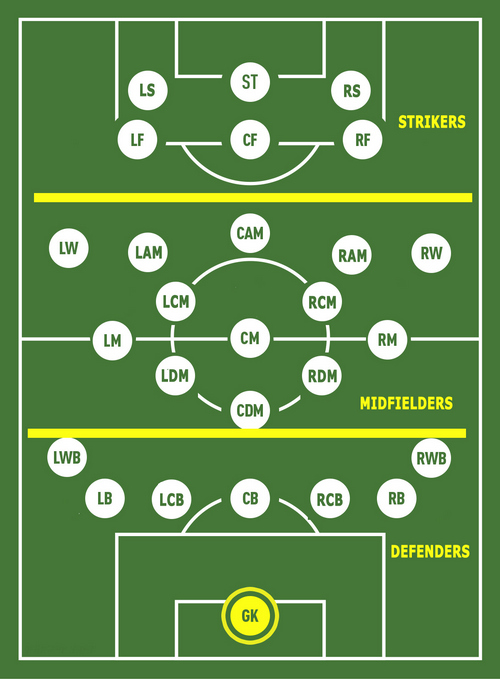

In [17]:
Image(filename = "all-positions.jpg", width = 400)

**So, our goal will be to determine if a player plays into each of those 4 groups.** 

I am categorizing them based on my experience. 

- Strikers = RF, CF, LF, RS, LS, ST
- Midfielders = LW, LAM, LM, LCM, LDM, CAM, CM, CDM, RDM, RCM, RM, RAM, RW
- Defenders = LWB, LB, LCB, CB, RCB, RB, RWB
- Goalkeepers = GK

Now, let's replace all of the above positions with those 4 types that I have created.

In [18]:
df.Position = df.Position.replace(['RF', 'CF', 'LF', 'RS', 'LS', 'ST'], "STRIKER")
df.Position = df.Position.replace(['LW', 'LAM', 'LM', 'LCM', 'LDM', 'CAM', 'CM', 'CDM', 'RDM', 'RCM', 'RM', 'RAM', 'RW'], "MIDFIELDER")
df.Position = df.Position.replace(['LWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'RWB'], "DEFENDER")
df.Position.replace('GK', "GOALKEEPER")

0           STRIKER
1           STRIKER
2        MIDFIELDER
3        GOALKEEPER
4        MIDFIELDER
            ...    
18202    MIDFIELDER
18203       STRIKER
18204       STRIKER
18205    MIDFIELDER
18206    MIDFIELDER
Name: Position, Length: 18147, dtype: object

A quick check to see if we did the job correctly:

In [19]:
df.Position.unique()

array(['STRIKER', 'MIDFIELDER', 'GK', 'DEFENDER'], dtype=object)

Great! <br> We have successfully grouped the positions into 4 classes. Let's see their distribution.

In [20]:
df.groupby(['Position']).size()


Position
DEFENDER      5866
GK            2025
MIDFIELDER    7589
STRIKER       2667
dtype: int64

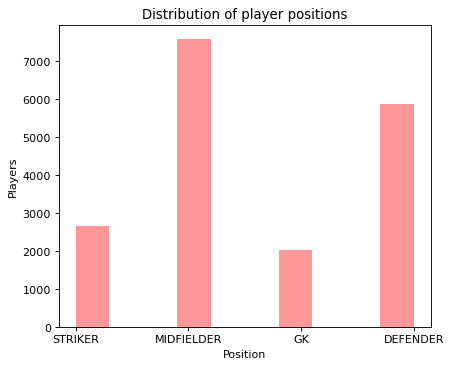

In [21]:
plt.figure(figsize=(6, 5), dpi=80)
df['Position'].hist(color='red', alpha=0.4, bins=10)
plt.grid(False)
plt.xlabel('Position')
plt.ylabel('Players')
plt.title('Distribution of player positions')
plt.show()

Now our column with the players positions looks much better.<br><br>
We have 4 different types of player roles and our logarithm will need to categorise each player to fit into those 4 types.<br>
I am guessing that the easiest to be classified will be the Goalkeeper class as the skills required for a Goalkeeper are totally different from the skills for all other players. But let's see.<br><br>
I will create new variable **positions** for the player positions.

In [22]:
positions = df.Position
positions

0           STRIKER
1           STRIKER
2        MIDFIELDER
3                GK
4        MIDFIELDER
            ...    
18202    MIDFIELDER
18203       STRIKER
18204       STRIKER
18205    MIDFIELDER
18206    MIDFIELDER
Name: Position, Length: 18147, dtype: object

In [23]:
positions.shape

(18147,)

### 3.3 Feature Selection $\color{red}{\text{ 'skills' }}$

We are interested in the columns from **Crossing** to the end (excluding the last column). <br>
Lets find the index of the **Crossing** column and create a dataframe for all the skills and call it **skills**.

In [24]:
df.columns.get_loc("Crossing")

53

In [25]:
skills = df.iloc[:, 53 : -1]
skills.shape

(18147, 34)

So we have left with 34 columns with player's skills. <br>
Let's take a look and examine them.

In [26]:
skills.sample(5)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
15595,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,24.0,18.0,27.0,22.0,29.0,48.0,38.0,17.0,43.0,25.0,63.0,9.0,27.0,10.0,5.0,25.0,16.0,47.0,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0
7864,16.0,8.0,21.0,29.0,10.0,8.0,17.0,19.0,30.0,16.0,42.0,43.0,51.0,61.0,30.0,21.0,35.0,30.0,58.0,10.0,22.0,9.0,7.0,36.0,14.0,55.0,11.0,13.0,11.0,68.0,65.0,62.0,65.0,70.0
16744,44.0,52.0,50.0,60.0,43.0,55.0,47.0,49.0,57.0,54.0,60.0,54.0,62.0,53.0,63.0,55.0,50.0,57.0,50.0,59.0,41.0,50.0,47.0,50.0,54.0,52.0,56.0,58.0,55.0,6.0,5.0,14.0,6.0,7.0
10551,67.0,42.0,58.0,65.0,37.0,63.0,43.0,38.0,67.0,62.0,54.0,51.0,60.0,59.0,69.0,69.0,71.0,68.0,73.0,54.0,74.0,69.0,54.0,54.0,42.0,60.0,62.0,66.0,68.0,13.0,11.0,13.0,11.0,16.0
10898,43.0,49.0,59.0,63.0,38.0,58.0,44.0,45.0,61.0,63.0,64.0,65.0,64.0,65.0,66.0,62.0,67.0,74.0,75.0,56.0,68.0,64.0,55.0,58.0,48.0,63.0,63.0,65.0,62.0,8.0,7.0,9.0,9.0,9.0


In [27]:
skills.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019
std,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


### 3.4 Normalization of the skill values

It looks like the skills are in the range between 1 and 97 so it will be a good idea to use normalization and fit them between 0 and 1. <br>
This will help our algorithms to perform better and perform faster.

In [28]:
scaler = MinMaxScaler()
scaler.fit(skills)

MinMaxScaler()

In [29]:
skills_scaled = scaler.transform(skills)

Let's check if everything is OK

In [30]:
skills_scaled

array([[0.89772727, 1.        , 0.73333333, ..., 0.15555556, 0.14606742,
        0.07526882],
       [0.89772727, 0.98924731, 0.94444444, ..., 0.15555556, 0.14606742,
        0.10752688],
       [0.84090909, 0.91397849, 0.64444444, ..., 0.15555556, 0.15730337,
        0.10752688],
       ...,
       [0.22727273, 0.40860215, 0.46666667, ..., 0.1       , 0.05617978,
        0.12903226],
       [0.44318182, 0.51612903, 0.38888889, ..., 0.14444444, 0.07865169,
        0.08602151],
       [0.40909091, 0.34408602, 0.46666667, ..., 0.08888889, 0.12359551,
        0.08602151]])

Yes, everything looks ok with the normalization. <br><br>

### 3.5. Splitting the data

We can now use the SKlearn function **train_test_split()** to split the data into a training set and a test set. <br>
It will be a good idea to use also **stratify** as the number of the Goalkeeprs and Strikers is much smaller than the other classes. <br> <br> Our database is relatively large, so I will not use the default value and will pick 20% as a test data.

In [31]:
skills_train, skills_test, position_train, position_test = train_test_split(
    skills_scaled, positions, stratify=positions, test_size = 0.20)

Lets check both training and test sets to see if we have splited them correctly.

In [32]:
skills_train.shape, position_train.shape

((14517, 34), (14517,))

In [33]:
skills_test.shape, position_test.shape

((3630, 34), (3630,))

Everything seems ready. We have done our Data Preparation job. Let's now continue with the real ML work.

# 4.  Algorithm Evaluation

I am planning to start with the basic Logistic regression. It should do the job relatively good as I already investigated manually the data we have.

### 4.1. Logistic Regression

The logistic regration model will do predictions of the player position by analyzing the relationship between the player skills on the training data.

In [34]:
logistic = LogisticRegression(max_iter=10000)

In [35]:
logistic.fit(skills_train, position_train)

LogisticRegression(max_iter=10000)

Let's check the report on both training and test sets.

In [36]:
logistic.score(skills_train, position_train)

0.9070744644210236

In [37]:
logistic_score = logistic.score(skills_test, position_test)
logistic_score

0.9044077134986226

Yes, very good score on the test data! I was expecting something like that. 

In [38]:
print(classification_report(position_train, logistic.predict(skills_train)))

              precision    recall  f1-score   support

    DEFENDER       0.92      0.92      0.92      4693
          GK       1.00      1.00      1.00      1620
  MIDFIELDER       0.88      0.90      0.89      6071
     STRIKER       0.88      0.84      0.86      2133

    accuracy                           0.91     14517
   macro avg       0.92      0.91      0.92     14517
weighted avg       0.91      0.91      0.91     14517



There is almost no difference between both training and test scores. We have some bias and the model was not able to generalize correctly each of the classes but the variance is not significant. Lets first try to improve this model and later we can try with other algorithms. 

I will use Grid Search Cross Validation to try different hyperparameters on our Logistic regression.

In [39]:
logistic_params = {
    "C" : [0.1, 1, 10, 100, 1000],  # Appliyng different regularization strenght
}

In [40]:
grid_search_logistic = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=logistic_params)

In [41]:
grid_search_logistic.fit(skills_train, position_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [42]:
grid_search_logistic_score = grid_search_logistic.score(skills_test, position_test)
grid_search_logistic_score

0.9030303030303031

In [43]:
print(classification_report(position_train, grid_search_logistic.predict(skills_train)))

              precision    recall  f1-score   support

    DEFENDER       0.92      0.92      0.92      4693
          GK       1.00      1.00      1.00      1620
  MIDFIELDER       0.88      0.90      0.89      6071
     STRIKER       0.87      0.84      0.86      2133

    accuracy                           0.91     14517
   macro avg       0.92      0.91      0.92     14517
weighted avg       0.91      0.91      0.91     14517



In [44]:
grid_search_logistic.best_estimator_

LogisticRegression(C=1000, max_iter=10000)

In [45]:
grid_search_logistic.cv_results_

{'mean_fit_time': array([0.58669796, 1.16663537, 2.35710855, 2.28783755, 1.38511615]),
 'std_fit_time': array([0.04335395, 0.24314163, 0.30740937, 0.40415146, 0.14865646]),
 'mean_score_time': array([0.00459867, 0.00259919, 0.00260024, 0.00359845, 0.00359936]),
 'std_score_time': array([0.00135583, 0.00049072, 0.00049109, 0.00135627, 0.00185479]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
 'split0_test_score': array([0.89772727, 0.90633609, 0.90426997, 0.90461433, 0.90461433]),
 'split1_test_score': array([0.89428375, 0.89910468, 0.89910468, 0.89944904, 0.89910468]),
 'split2_test_score': array([0.88529108, 0.89631416, 0.90217017, 0.90217017, 0.90217017]),
 'split3_test_score': array([0.89528074, 0.91250431, 0.91215983, 0.91250431, 0.91319325]),
 'split4_test_score': array([0.90148123, 0.91078195,

We were not able to optimize the basic Logistic Regression. The Grid Search tells us that if we apply a lower regularization C=100 or C=1000, the model will perform better - 91% accuracy, so we did some small improvement but not a significant one. <br><br>
So, let's try to fit another algorithm. 

### 4.2. Decision Tree Classifier

In [46]:
decision_tree = DecisionTreeClassifier()

In [47]:
decision_tree.fit(skills_train, position_train)

DecisionTreeClassifier()

In [48]:
decision_tree_score = decision_tree.score(skills_test, position_test)
decision_tree_score

0.8443526170798898

The result is much lower than the result from the Logistic Regression. Lets try to optimize the Decision Tree algo a little bit. <br>
The first parameter to tune is **max_depth**. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

In [49]:
decision_tree_params = {
    "max_depth" : [5, 7, 9, 11, 13, 15, 17, 19], # The deeper tree, the more splits it has and it captures more info.
    "max_features" : [3, 4, 5, 6],  # Number of features to consider for best split
    "min_samples_leaf": [0.1, 1, 10]  # The minimum number of samples required to be at a leaf node. 
}

In [50]:
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=decision_tree_params)

In [51]:
grid_search_decision_tree.fit(skills_train, position_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [0.1, 1, 10]})

In [52]:
grid_search_decision_tree_score = grid_search_decision_tree.score(skills_test, position_test)
grid_search_decision_tree_score

0.8465564738292011

In [53]:
grid_search_decision_tree.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features=6, min_samples_leaf=10)

In [54]:
grid_search_decision_tree.cv_results_

{'mean_fit_time': array([0.01821399, 0.01682553, 0.01599908, 0.01579876, 0.01759901,
        0.01730022, 0.01759882, 0.01919961, 0.01859956, 0.01899796,
        0.02260208, 0.0203989 , 0.01419883, 0.0191987 , 0.01839862,
        0.01680398, 0.0225904 , 0.02459412, 0.0197916 , 0.02207274,
        0.02340102, 0.01919117, 0.02479897, 0.026999  , 0.01579814,
        0.02320123, 0.02319331, 0.01760511, 0.02420521, 0.03040624,
        0.02862935, 0.04279475, 0.05199957, 0.02899766, 0.04579763,
        0.02879834, 0.01399918, 0.02159882, 0.02099857, 0.01539898,
        0.02939882, 0.02879987, 0.01780438, 0.03279238, 0.03001881,
        0.02060785, 0.03600554, 0.03279901, 0.01539936, 0.02519922,
        0.02580166, 0.01700125, 0.0297904 , 0.02760005, 0.01759953,
        0.03179908, 0.02979922, 0.01739974, 0.03489032, 0.03359919,
        0.01419873, 0.02799902, 0.03814588, 0.03097849, 0.05019269,
        0.04396996, 0.02779932, 0.04220548, 0.0309783 , 0.01880856,
        0.04013195, 0.03406944,

The best result seems to be with (max_depth=13, max_features=6, min_samples_leaf=10). It hitted our maximum max_features and min_samples_leaf. So let me increase those values and try one more time. 

In [55]:
decision_tree_params_v2 = {
    "max_depth" : [13],
    "max_features" : [6, 7, 8, 10],
    "min_samples_leaf": [10, 13, 15]
}

In [56]:
grid_search_decision_tree_v2 = GridSearchCV(DecisionTreeClassifier(), param_grid=decision_tree_params_v2)

In [57]:
grid_search_decision_tree_v2.fit(skills_train, position_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [13], 'max_features': [6, 7, 8, 10],
                         'min_samples_leaf': [10, 13, 15]})

In [58]:
grid_search_decision_tree_v2.score(skills_test, position_test)

0.8619834710743801

In [59]:
grid_search_decision_tree_v2.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features=10, min_samples_leaf=15)

Yes, slightly better results! <br>The best hyperparameter values are (max_depth=13, max_features=8, min_samples_leaf=13) but accuracy of 87% is much worse than the Logistic regression model. <br><br>
Let's test another algorithm.

### 4.3. Random Forest Classifier

This algorithm will create many Decision Trees and the output class will be the one selected by the most trees.

In [60]:
random_forest = RandomForestClassifier()

In [61]:
random_forest.fit(skills_train, position_train)

RandomForestClassifier()

In [62]:
random_forest_score = random_forest.score(skills_test, position_test)
random_forest_score

0.9104683195592287

We have almost the same results as with the Logistic Regression. But it seems that the Random Forest model is slightly better. 

#### Importance of the features

Lets see which player skills had the highest strength among the trees and were selected most of the times.

In [63]:
skills_power = random_forest.feature_importances_
skills_power

array([0.05366415, 0.06066306, 0.06145322, 0.02419167, 0.02342059,
       0.02680307, 0.01466247, 0.0216473 , 0.0456811 , 0.0195705 ,
       0.0126629 , 0.01492639, 0.01234664, 0.00765435, 0.01256143,
       0.01625082, 0.01333943, 0.01032061, 0.02469006, 0.03202236,
       0.00932584, 0.04590305, 0.04951801, 0.05178942, 0.02118737,
       0.00842501, 0.03750631, 0.05679611, 0.08139383, 0.03003764,
       0.0272772 , 0.01971835, 0.03195097, 0.02063877])

In [64]:
result = np.where(skills_power > 0.04)
result

(array([ 0,  1,  2,  8, 21, 22, 23, 27, 28], dtype=int64),)

In [65]:
skill = list(skills)
skill[0], skill[1], skill[2], skill[8], skill[21], skill[23], skill[27], skill[28], skill[33]


('Crossing',
 'Finishing',
 'HeadingAccuracy',
 'LongPassing',
 'Interceptions',
 'Vision',
 'StandingTackle',
 'SlidingTackle',
 'GKReflexes')

Yes, the first 3 skills **Crossing**, **Finishing**, **HeadingAccuracy**  were chosen as important and they are really important for the Strikers. Then **LongPassing**, **Interceptions** and **Vision** were marked as important skills, because they best fit for the midfielders and **StandingTackle**, **SlidingTackle** were chosen as skills important for the defenders. The last 5 skills are goalkeeping skills and the most important skill was the **GKReflexes**. Great!

In [66]:
skills

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [67]:
result2 = np.where(skills_power < 0.01)
result2

(array([13, 20, 25], dtype=int64),)

In [68]:
skill[13], skill[17], skill[25]

('Reactions', 'Stamina', 'Composure')

The skills **Reactions**, **Stamina** and **Composure** were distributed in such a way among the players, so the algorithm was not able to use them for creating classification based on them. They were of the least importance. 

### 4.4. AdaBoost Classifier

In [69]:
ada = AdaBoostClassifier()

In [70]:
ada.fit(skills_train, position_train)

AdaBoostClassifier()

In [71]:
ada_score = ada.score(skills_test, position_test)
ada_score

0.6071625344352617

In [72]:
print(classification_report(position_train, ada.predict(skills_train)))

              precision    recall  f1-score   support

    DEFENDER       0.52      0.99      0.68      4693
          GK       1.00      1.00      1.00      1620
  MIDFIELDER       0.86      0.14      0.23      6071
     STRIKER       0.57      0.80      0.67      2133

    accuracy                           0.60     14517
   macro avg       0.74      0.73      0.65     14517
weighted avg       0.72      0.60      0.53     14517



In [73]:
ada.feature_importances_

array([0.  , 0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.14, 0.14, 0.04, 0.16, 0.06, 0.  , 0.22,
       0.06])

Yes, most of the skills were punished to 0 but this didn't help and the model performs much worse.

In [74]:
ada_params={
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8, 16, 24, 32, 64],
}

In [75]:
ada_grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=ada_params)

In [76]:
ada_grid_search.fit(skills_train, position_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.005, 0.01],
                         'n_estimators': [8, 16, 24, 32, 64]})

In [77]:
ada_grid_search_score = ada_grid_search.score(skills_test, position_test)
ada_grid_search_score

0.7115702479338843

In [78]:
ada_grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=32)

The worst results so far. Let's move to the next algorithm.

### 4.5. KNeighbors Classifier

In [79]:
knn = KNeighborsClassifier()
knn.fit(skills_train, position_train)

KNeighborsClassifier()

In [80]:
knn.score(skills_test, position_test)

0.8942148760330578

Let's test with different **neighbours** value.

In [81]:
neighbours = {
    "n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
}

In [82]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=neighbours)
knn_grid_search.fit(skills_train, position_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [83]:
knn_grid_search.score(skills_test, position_test)

0.8991735537190083

In [84]:
knn_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=13)

It looks like we archieved pretty descent accuracy with the **KNN model** and **n_neighbours** between 11 and 17

### 4.6. Support Vector Machine

#### 4.6.1. LinearSVC

In [85]:
svm = LinearSVC()

In [86]:
svm.fit(skills_train, position_train)

LinearSVC()

In [87]:
svm_score = svm.score(skills_test, position_test)
svm_score

0.9022038567493113

#### 4.6.2 C-Support Vector Classification

In [88]:
svc = SVC()

In [89]:
svc.fit(skills_train, position_train)

SVC()

In [90]:
svc = svc.score(skills_test, position_test)
svc

0.9134986225895316

WOW! <br> The C-Support Vector Classification algorithm with the default settings gave us the best results. <br> 91% Accuracy! 

## 5. Result Improvement

From all of the algorithms that we tried - the SVC had the best result. Let's pick it and try to improve our best model to become even better.

In [91]:
svc_params = {
    "kernel" : ["poly", "rbf"]
}

In [92]:
grid_search_svc = GridSearchCV(SVC(), param_grid=svc_params)

In [93]:
grid_search_svc.fit(skills_train, position_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['poly', 'rbf']})

In [94]:
grid_search_svc_score = grid_search_svc.score(skills_test, position_test)
grid_search_svc_score

0.9134986225895316

In [95]:
grid_search_svc.best_estimator_

SVC()

It seems that we have better results if we don't use the default kernel type but we use "poly".

Now lets play around with the regularization paramether C.

In [96]:
svc_params_v2 = {
    "C" : [0.1, 1, 10, 100]
}

In [97]:
grid_search_svc_v2 = GridSearchCV(SVC(), param_grid=svc_params_v2)

In [98]:
grid_search_svc_v2.fit(skills_train, position_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [99]:
grid_search_svc_v2_score = grid_search_svc_v2.score(skills_test, position_test)
grid_search_svc_v2_score

0.9162534435261708

In [100]:
grid_search_svc_v2.best_estimator_

SVC(C=10)

In [101]:
grid_search_svc_v2.cv_results_

{'mean_fit_time': array([2.40619688, 1.61006694, 1.68608403, 3.31768389]),
 'std_fit_time': array([0.17017862, 0.07898349, 0.05533704, 0.25816552]),
 'mean_score_time': array([0.64353352, 0.42093921, 0.36544857, 0.34586267]),
 'std_score_time': array([0.0403405 , 0.00727371, 0.0045275 , 0.03650005]),
 'param_C': masked_array(data=[0.1, 1, 10, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.91184573, 0.91528926, 0.91460055, 0.91150138]),
 'split1_test_score': array([0.90633609, 0.90633609, 0.90426997, 0.89497245]),
 'split2_test_score': array([0.89803651, 0.90733724, 0.91215983, 0.90802618]),
 'split3_test_score': array([0.90974854, 0.91939373, 0.92283844, 0.91526008]),
 'split4_test_score': array([0.91422666, 0.9173269 , 0.91457113, 0.91078195]),
 'mean_test_score': array([0.90803871, 0.91313664, 0.91368799, 0.90810841]),
 'std_test_score':

In [102]:
print(classification_report(position_train, grid_search_svc_v2.predict(skills_train)))

              precision    recall  f1-score   support

    DEFENDER       0.94      0.94      0.94      4693
          GK       1.00      1.00      1.00      1620
  MIDFIELDER       0.91      0.92      0.92      6071
     STRIKER       0.91      0.87      0.89      2133

    accuracy                           0.93     14517
   macro avg       0.94      0.93      0.94     14517
weighted avg       0.93      0.93      0.93     14517



# 6. Result Presentation

We had a very interesting problem - to classify football players based on a dataset with their skills. It was both easy and hard task as from first glance it should be easy to separate the different classes of players based on their attributes but as some of the players have adequate skills in many areas. They can play either as defenders or midfielders or even as strikers. <br><br>

*******

At the end, our best SVC model was able to predict the target position with an accuracy of 93%. This is very close to my initial prediction that the best model can have not more than 95% accuracy. 

The hardest positions to predict were the strikers with 89% accuracy while the Goalkeepers were easy for almost all of the algorithms and there we have had 100% accuracy. 